# Week 3 handin

## 01 Assignment

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status
EX 1 and 2 done. 

## Solution 1 part 1-6 and 9

In [1]:
#Create 3 classes: Student, DataSheet and Course
#A student has a data_sheet and a data_sheet has multiple courses in particular order
#Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
#In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
#In DataSheet create a method to get_grades_as_list()
#In student create a method: get_avg_grade()

import random , csv, operator, matplotlib.pyplot as plt
from modules import week2

class Student():
    
    def __init__(self, name, gender, image_url):
        self.name = name
        self.gender = gender
        self.image_url = image_url
        self.data_sheet = DataSheet()
        
    def __str__(self):
        return '{name} ({gender}) attending courses: {courses}.'.format(
            name=self.name, courses=self.data_sheet.__str__(), gender=self.gender)
        
    def get_avg_grade(self):
        lst = self.data_sheet.get_grades_as_list()
        g_sum = 0
        for grade in lst:
            g_sum += int(grade)
        avg_grade = g_sum/len(lst)
        return avg_grade

    def show_progression(self):
        etcs_sum = 0
        for c in self.data_sheet.courses:
            etcs_sum += int(c.etcs)
        progres_in_percent = round((etcs_sum/150)*100)
        return progres_in_percent
            
        
class DataSheet():
    
    def __init__(self):
        self.courses = []
        
    def __str__(self):
        String = ""
        for c in self.courses:
            String += "\n" + c.name + "\n Teacher: " + c.teacher + "\n ETCS: " + c.etcs + "\n Classroom: " + str(c.classroom) + "\n Grade: " + str(c.grade)
        return String +"\n"
        
    def get_grades_as_list(self):
        lst = []
        for x in self.courses:
            lst.append(x.grade)
        return lst
        
    def add_course(self, *Course):
        for c in Course:
            self.courses.append(c)
    
class Course():
    
    def __init__(self, name, classroom, teacher, etcs):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.etcs = etcs
        self.grade = None
        
    def set_grade(self, grade):
        self.grade = grade
        
    


## Solution 1 part 7

In [2]:
#Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
#Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

def generate_student(n, output_file):
    StudentNameList = ["Andreas", "Alex", "Benjamin", "Nicolas", "Christoffer", "Lars", "Kim", "Henrik", "Victor", "Lenny", "Kasper", "Bo", "Hans"]
    TeacherNames = ["Lise", "kurt", "Arne", "Tess", "Nicolaj"]
    ClassRooms = [1,2,3,4,5,6,7,8,9]
    CourseNames = ["Math", "Chemestry", "Gym", "Danglish", "English", "Computer Science", "physics"]
    Grades = [00, 2, 4, 7, 10, 12]
    Students = []
    for x in range(n):
        newStudent = Student(random.choice(StudentNameList), "Male", "Image_url")
        for i in range(random.choice([1,2,3,4,5])):
            course = Course(random.choice(CourseNames), random.choice(ClassRooms), random.choice(TeacherNames), 30)
            newStudent.data_sheet.add_course(course)
        for c in newStudent.data_sheet.courses:
            c.set_grade(random.choice(Grades))
        Students.append(newStudent)
    with open(output_file, "w") as file:
        for s in Students:
            for c in s.data_sheet.courses:
                file.write(s.name + ',' + s.gender + ',' + c.name + ',' + c.teacher + ',' + str(c.etcs) + ',' + str(c.classroom) + ',' + str(c.grade) + ',' + s.image_url + '\n')
    return Students

In [3]:
generate_student(15, 'modules/csv_week_3.txt')
!cat modules/csv_week_3.txt

Hans,Male,Computer Science,Lise,30,3,0,Image_url
Lars,Male,Gym,kurt,30,6,4,Image_url
Lars,Male,Computer Science,kurt,30,5,2,Image_url
Benjamin,Male,Computer Science,Lise,30,4,10,Image_url
Benjamin,Male,English,Lise,30,5,4,Image_url
Kasper,Male,Math,Arne,30,2,0,Image_url
Hans,Male,Computer Science,kurt,30,7,0,Image_url
Hans,Male,Computer Science,Lise,30,4,7,Image_url
Hans,Male,Gym,Tess,30,9,0,Image_url
Hans,Male,Gym,Nicolaj,30,3,12,Image_url
Christoffer,Male,Math,kurt,30,2,0,Image_url
Christoffer,Male,physics,kurt,30,8,0,Image_url
Victor,Male,physics,kurt,30,6,12,Image_url
Hans,Male,English,Nicolaj,30,6,12,Image_url
Hans,Male,English,Tess,30,3,12,Image_url
Hans,Male,Computer Science,kurt,30,7,7,Image_url
Christoffer,Male,English,Tess,30,7,7,Image_url
Christoffer,Male,Computer Science,kurt,30,8,10,Image_url
Christoffer,Male,Chemestry,Arne,30,5,2,Image_url
Christoffer,Male,physics,Arne,30,6,10,Image_url
Christoffer,Male,English,kurt,30,3,7,Image_url
Christoffer,Male,Chemestry,Lise,30,8,12

## Solution 1 part 8

In [4]:
#Read student data into a list of Students from a csv file:

def read_csv_into_students(input_file):
    new_list = []
    with open(input_file, "r") as f:
        csv_reader = csv.reader(f)
        name = ''
        for row in csv_reader:
            course = Course(row[2], row[5], row[3], row[4])
            if name != row[0]:
                name = row[0]
                newStudent = Student(name, row[1], row[7])
                newStudent.data_sheet.add_course(course)
                course.set_grade(row[6])
                new_list.append(newStudent)
            else:
                newStudent.data_sheet.add_course(course)
                course.set_grade(row[6])            
    return new_list

StdList = read_csv_into_students('modules/csv_week_3.txt')
for s in StdList:
    print(s)

Hans (Male) attending courses: 
Computer Science
 Teacher: Lise
 ETCS: 30
 Classroom: 3
 Grade: 0
.
Lars (Male) attending courses: 
Gym
 Teacher: kurt
 ETCS: 30
 Classroom: 6
 Grade: 4
Computer Science
 Teacher: kurt
 ETCS: 30
 Classroom: 5
 Grade: 2
.
Benjamin (Male) attending courses: 
Computer Science
 Teacher: Lise
 ETCS: 30
 Classroom: 4
 Grade: 10
English
 Teacher: Lise
 ETCS: 30
 Classroom: 5
 Grade: 4
.
Kasper (Male) attending courses: 
Math
 Teacher: Arne
 ETCS: 30
 Classroom: 2
 Grade: 0
.
Hans (Male) attending courses: 
Computer Science
 Teacher: kurt
 ETCS: 30
 Classroom: 7
 Grade: 0
Computer Science
 Teacher: Lise
 ETCS: 30
 Classroom: 4
 Grade: 7
Gym
 Teacher: Tess
 ETCS: 30
 Classroom: 9
 Grade: 0
Gym
 Teacher: Nicolaj
 ETCS: 30
 Classroom: 3
 Grade: 12
.
Christoffer (Male) attending courses: 
Math
 Teacher: kurt
 ETCS: 30
 Classroom: 2
 Grade: 0
physics
 Teacher: kurt
 ETCS: 30
 Classroom: 8
 Grade: 0
.
Victor (Male) attending courses: 
physics
 Teacher: kurt
 ETCS: 30


In [5]:
#loop through the list and print each student with name, img_url and avg_grade.
for s in StdList:
    print(s.name + ' Looks like: ' + s.image_url + ' and has an average grade of: ' + str(s.get_avg_grade()))

Hans Looks like: Image_url and has an average grade of: 0.0
Lars Looks like: Image_url and has an average grade of: 3.0
Benjamin Looks like: Image_url and has an average grade of: 7.0
Kasper Looks like: Image_url and has an average grade of: 0.0
Hans Looks like: Image_url and has an average grade of: 4.75
Christoffer Looks like: Image_url and has an average grade of: 0.0
Victor Looks like: Image_url and has an average grade of: 12.0
Hans Looks like: Image_url and has an average grade of: 10.333333333333334
Christoffer Looks like: Image_url and has an average grade of: 8.0
Kasper Looks like: Image_url and has an average grade of: 1.0
Bo Looks like: Image_url and has an average grade of: 6.0
Lenny Looks like: Image_url and has an average grade of: 6.333333333333333
Lars Looks like: Image_url and has an average grade of: 4.0
Benjamin Looks like: Image_url and has an average grade of: 7.5


In [6]:
#sort the list by avg_grade
sorted_by_avg_grade = sorted(StdList, key=operator.methodcaller('get_avg_grade'))
for s in sorted_by_avg_grade:
    print(s.name + '\t ' + str(s.get_avg_grade()))

Hans	 0.0
Kasper	 0.0
Christoffer	 0.0
Kasper	 1.0
Lars	 3.0
Lars	 4.0
Hans	 4.75
Bo	 6.0
Lenny	 6.333333333333333
Benjamin	 7.0
Benjamin	 7.5
Christoffer	 8.0
Hans	 10.333333333333334
Victor	 12.0


<function matplotlib.pyplot.show(*args, **kw)>

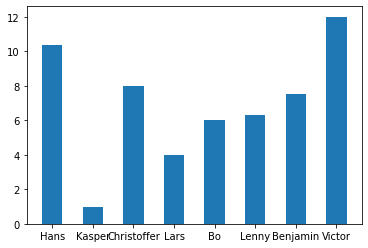

In [7]:
#create a bar chart with student_name on x and avg_grade on y-axis
names = []
for s in sorted_by_avg_grade:
    names.append(s.name)
grades = []
for s in sorted_by_avg_grade:
    grades.append(s.get_avg_grade())
plt.bar(names,grades,width=0.5, align='center')
plt.show

## Solution 1 part 9

In [8]:
#Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
for s in sorted_by_avg_grade:
    print(s.name + ' has completed: ' + str(s.show_progression()) + '% of the education.')

Hans has completed: 20% of the education.
Kasper has completed: 20% of the education.
Christoffer has completed: 40% of the education.
Kasper has completed: 40% of the education.
Lars has completed: 40% of the education.
Lars has completed: 40% of the education.
Hans has completed: 80% of the education.
Bo has completed: 40% of the education.
Lenny has completed: 60% of the education.
Benjamin has completed: 40% of the education.
Benjamin has completed: 80% of the education.
Christoffer has completed: 120% of the education.
Hans has completed: 60% of the education.
Victor has completed: 20% of the education.


## Solution 1 part 10

<function matplotlib.pyplot.show(*args, **kw)>

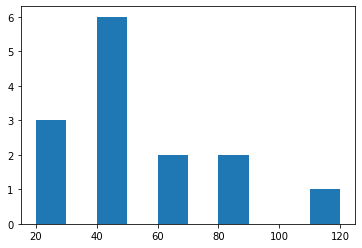

In [9]:
#Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)
number_of_students = []
for s in sorted_by_avg_grade:
    number_of_students.append(s.show_progression())
plt.hist(number_of_students, density=False, bins=10)
plt.show